# Homework 1 Problem 3

We'll use most of the code from the first demo. Except we'll change the model architecture to a neural network.

In [ ]:
# We start by importing the libraries we'll use today
import numpy as np
import torch
import torchvision

In [ ]:
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



Just for fun :)

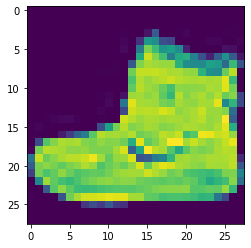

In [ ]:
image, label = trainingdata[0]
import matplotlib.pyplot as plt
plt.imshow(image.squeeze().numpy())
plt.show()

In [ ]:
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)

This is the code that we will modify.

In [ ]:
class NeuralNet(torch.nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()
    self.layers = torch.nn.Sequential(
      torch.nn.Linear(28*28, 256),
      torch.nn.ReLU(),
      torch.nn.Linear(256, 128),
      torch.nn.ReLU(),
      torch.nn.Linear(128, 64),
      torch.nn.ReLU(),
      torch.nn.Linear(64, 10)
    )
  
  def forward(self, x):
    x = x.view(-1, 28*28) # change so 784 vector instead of 28x28 matrix
    return self.layers(x)

model = NeuralNet() # Step 1: architecture
loss = torch.nn.CrossEntropyLoss() # Step 2: loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Step 3: training method

Now let's train our model!

In [ ]:
train_loss_history = []
test_loss_history = []

for epoch in range(20):
  train_loss = 0.0
  test_loss = 0.0
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    optimizer.zero_grad()
    predicted_output = model(images)
    fit = loss(predicted_output, labels)
    fit.backward()
    optimizer.step()
    train_loss += fit.item() / len(trainingdata)
  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      predicted_output = model(images)
      fit = loss(predicted_output, labels)
      test_loss += fit.item() / len(testdata)
  train_loss_history += [train_loss]
  test_loss_history += [test_loss]
  print(f'Epoch {epoch}, Train loss {train_loss}, Test loss {test_loss}')
    

Epoch 0, Train loss 0.03017668847242991, Test loss 0.01826045963764191
Epoch 1, Train loss 0.01404292911986509, Test loss 0.012877253043651579
Epoch 2, Train loss 0.010918888908127948, Test loss 0.010468805932998647
Epoch 3, Train loss 0.009533518889546384, Test loss 0.00952094677388668
Epoch 4, Train loss 0.008665241623918211, Test loss 0.009409717127680775
Epoch 5, Train loss 0.00805769820610683, Test loss 0.008694143959879878
Epoch 6, Train loss 0.007646009334673469, Test loss 0.007834929168224338
Epoch 7, Train loss 0.007304588014632469, Test loss 0.00856512912213802
Epoch 8, Train loss 0.00705862345869342, Test loss 0.0074665792196989085
Epoch 9, Train loss 0.006840728940566384, Test loss 0.007401666617393492
Epoch 10, Train loss 0.00665344113558531, Test loss 0.0074115656822919835
Epoch 11, Train loss 0.0064945328933497274, Test loss 0.0074688160717487325
Epoch 12, Train loss 0.006328917146225767, Test loss 0.006924765531718732
Epoch 13, Train loss 0.0062093817827602255, Test los

Let's plot our loss by epoch to see how we did.

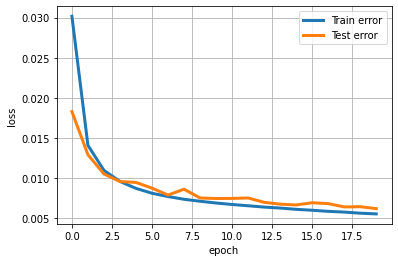

In [ ]:
plt.plot(range(20),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(20),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

<ipython-input-38-a6f75793b8e5>:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob_output = torch.nn.functional.softmax(predicted_output).detach().numpy()


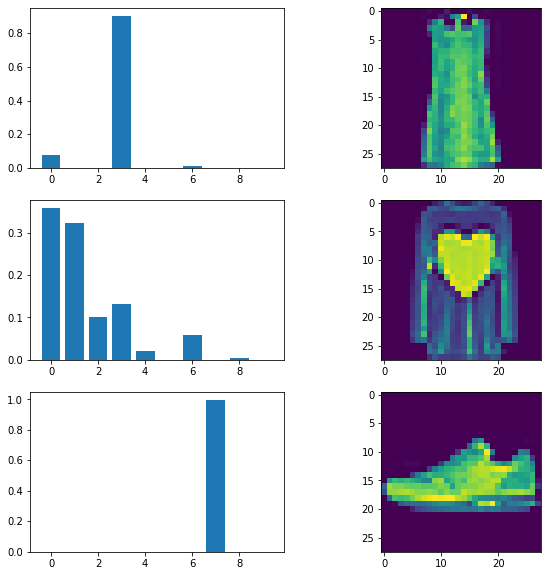

In [ ]:
plt.figure(figsize=(10,10))
for index in [0,1,2]:
  
  image = images[index]
  predicted_output = model(images)[index]
  # Need to apply softmax to get probabilities
  prob_output = torch.nn.functional.softmax(predicted_output).detach().numpy()

  plt.subplot(3,2,2*index+1)
  plt.bar(list(range(len(prob_output))), prob_output)
 
  plt.subplot(3,2,2*index+2)
  plt.imshow(image.squeeze().numpy())
  
plt.show()

The model is very good at predicting the shoe (likely because of its unusual shape). However, the model struggles with the dress likely because of the heart pattern on it and the various items of clothing with sleeves and similar shape.